# PRODIGY INTERNSHIP

## TASK 04 - Sentiment Analysis

Using the loaded dataset, I will perform sentiment analysis in social media to understand public opinion and attitude towards specific brands and topics.

### Importing Libraries

In [14]:
#!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 640.0 kB/s eta 0:00:01
   -------------- ------------------------- 112.6/301.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 2.3 MB/s eta 0:00:00


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Loading Dataset

In [20]:
# Load datasets
train_df = pd.read_csv("twitter_training.csv", header=None)
val_df = pd.read_csv("twitter_validation.csv", header=None)

# Combine them
df = pd.concat([train_df, val_df], ignore_index=True)
df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Content']
df

,Tweet_ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
75677,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75680,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


### Data Exploration

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [10]:
data.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [12]:
data.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [14]:
print("Unique Value Analysis of the Dataset")
print("\t")
for column in data.columns:
    unique_values = data[column].unique() # Displays unique values in a column
    count_unique_values = len(unique_values) # Displays number of unique values in a column
    print(f"Column Name: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {count_unique_values}")
    print("\n")

Unique Value Analysis of the Dataset
	
Column Name: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Values: 7


Column Name: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of Unique Values: 30


Column Name: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of Unique Values: 41


Column Name: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Values: 12


Column Name: Country
Unique Values: ['India']
Number of Unique Values: 1


Column Name: Gender
Unique Values: [0 1]
Number of Uniqu

### Data Cleaning

Removing Duplicates

In [17]:
data.shape

(148, 6)

In [19]:
print("Duplicate values in the dataset:")
print('\t')
data.duplicated().sum()

Duplicate values in the dataset:
	


4

In [21]:
data.drop_duplicates(inplace=True)

In [23]:
data.shape

(144, 6)

Missing Values

In [29]:
data.head(10)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


In [27]:
print("Missing/Null values in each column:")
print('\t')
missing_values = data.isnull().sum()
missing_values

Missing/Null values in each column:
	


Company     8
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [33]:
print("Replacing 0 with NaN values in the age column")
print('\t')
data['Age'] = data['Age'].replace(0,np.nan)
data

Replacing 0 with NaN values in the age column
	


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [35]:
print("Replacing missing values in the numerical columns with median and mode")
print('\t')
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Salary'] = data['Salary'].fillna(data['Salary'].median())
data

Replacing missing values in the numerical columns with median and mode
	


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [37]:
print("Replacing missing values in the categorical columns with mode")
print('\t')
data['Company'] = data['Company'].fillna(data['Company'].mode()[0])
data['Place'] = data['Place'].fillna(data['Place'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data

Replacing missing values in the categorical columns with mode
	


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


Outlier Removal

Since Age and Salary are the only continuous columns, we will perform outlier removal on those.

Boxplot Graph to visualize outliers in Age and Salary columns
	


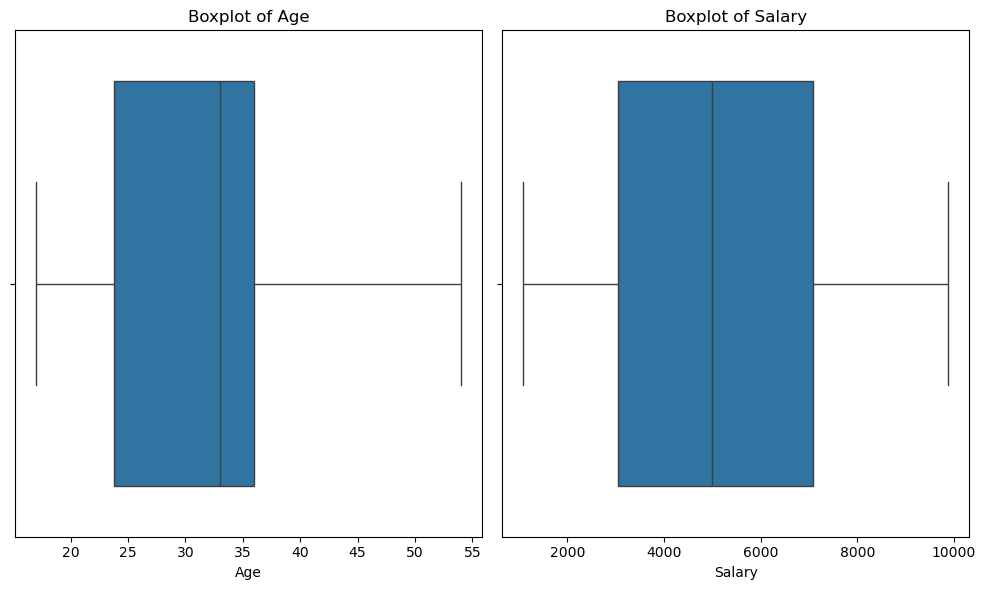

In [41]:
print("Boxplot Graph to visualize outliers in Age and Salary columns")
print('\t')
plt.figure(figsize=(10, 6))

# Plot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')

# Plot for Salary
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Salary'])
plt.title('Boxplot of Salary')
plt.xlabel('Salary')

# Show the plots
plt.tight_layout()
plt.show()

In [43]:
print("Using IQR Method to determine outliers in the Age column")
print('\t')
Q1_age = data['Age'].quantile(0.25)
Q3_age = data['Age'].quantile(0.75)

IQR_age = Q3_age - Q1_age

# Calculate the lower and upper bounds for outliers in 'age'
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Identify outliers in the 'age' column
age_outliers = data[(data['Age'] < lower_bound_age) | (data['Age'] > upper_bound_age)]

print("Using IQR Method to determine outliers in the Salary column")
print('\t')
Q1_salary = data['Salary'].quantile(0.25)
Q3_salary = data['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

# Calculate the lower and upper bounds for outliers in 'salary'
lower_bound_salary = Q1_salary - 1.5 * IQR_salary
upper_bound_salary = Q3_salary + 1.5 * IQR_salary

# Identify outliers in the 'salary' column
salary_outliers = data[(data['Salary'] < lower_bound_salary) | (data['Salary'] > upper_bound_salary)]

# 3. Display the outliers in Age and Salary columns
print("Outliers in Age:")
print(age_outliers)
print("\n")
print("Outliers in Salary:")
print(salary_outliers)

Using IQR Method to determine outliers in the Age column
	
Using IQR Method to determine outliers in the Salary column
	
Outliers in Age:
Empty DataFrame
Columns: [Company, Age, Salary, Place, Country, Gender]
Index: []


Outliers in Salary:
Empty DataFrame
Columns: [Company, Age, Salary, Place, Country, Gender]
Index: []


### EDA

In [22]:
print(df['Sentiment'].value_counts())
print(df['Entity'].value_counts())
df.info()

Sentiment
Negative      22808
Positive      21109
Neutral       18603
Irrelevant    13162
Name: count, dtype: int64
Entity
TomClancysRainbowSix                 2435
LeagueOfLegends                      2431
MaddenNFL                            2429
Microsoft                            2428
CallOfDuty                           2425
Verizon                              2414
ApexLegends                          2412
Facebook                             2403
CallOfDutyBlackopsColdWar            2403
WorldOfCraft                         2394
Dota2                                2391
FIFA                                 2378
NBA2K                                2373
Battlefield                          2372
TomClancysGhostRecon                 2368
johnson&johnson                      2367
Overwatch                            2366
Xbox(Xseries)                        2360
Amazon                               2350
PlayStation5(PS5)                    2343
GrandTheftAuto(GTA)                  

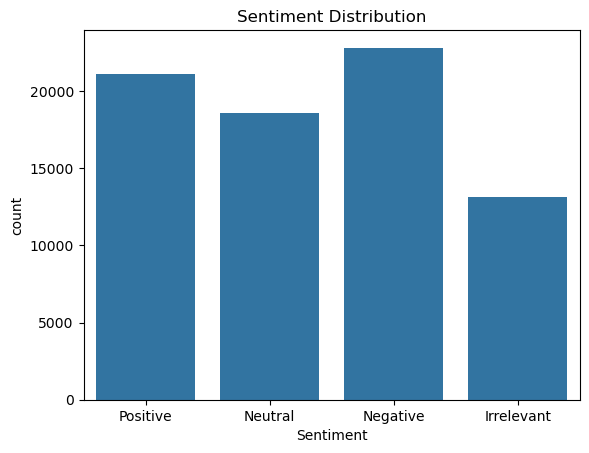

In [24]:
sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Distribution')
plt.show()

### Text Pre-processing

In [29]:
# Make sure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r"http\S+|@\S+|#\S+", "", text)  # Remove URLs, mentions, hashtags
        text = re.sub(r"[^a-zA-Z\s]", "", text)        # Remove special characters
        text = text.lower()                            # Lowercase
        text = " ".join(word for word in text.split() if word not in stop_words)
        return text
    else:
        return ""

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nms31\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df['Cleaned_Content'] = df['Content'].apply(clean_text)

### Visualizations

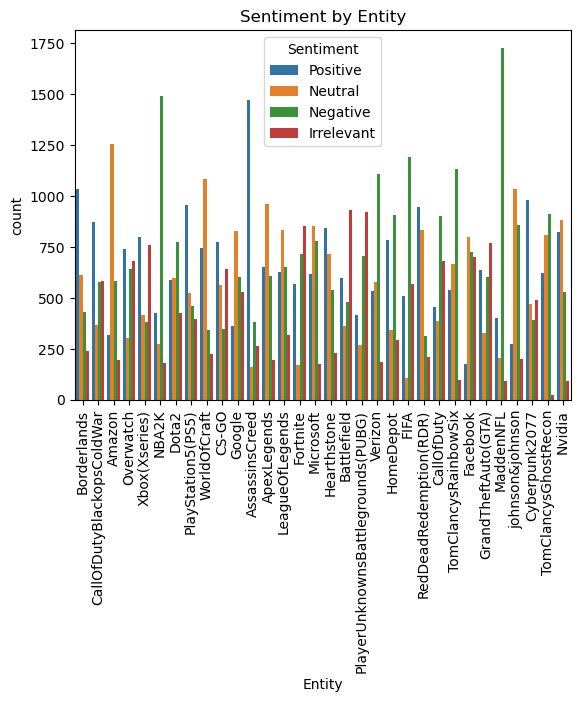

In [36]:
sns.countplot(data=df, x='Entity', hue='Sentiment')
plt.xticks(rotation=90)
plt.title('Sentiment by Entity')
plt.show()

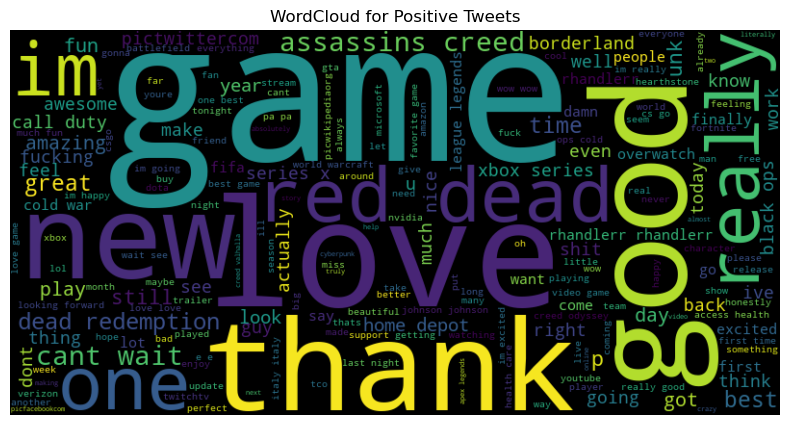

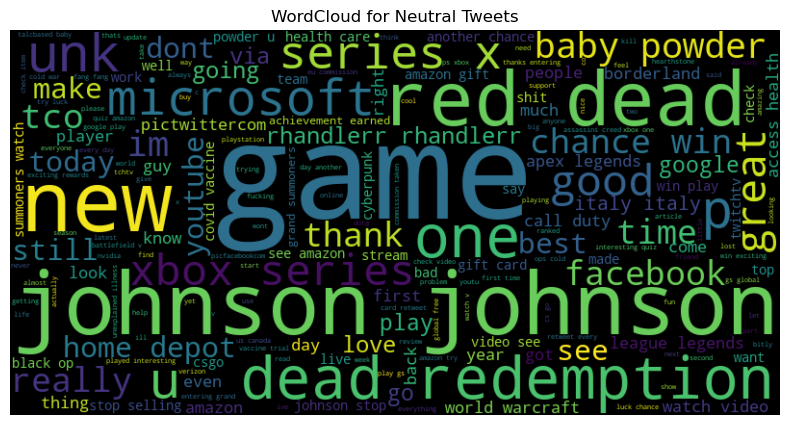

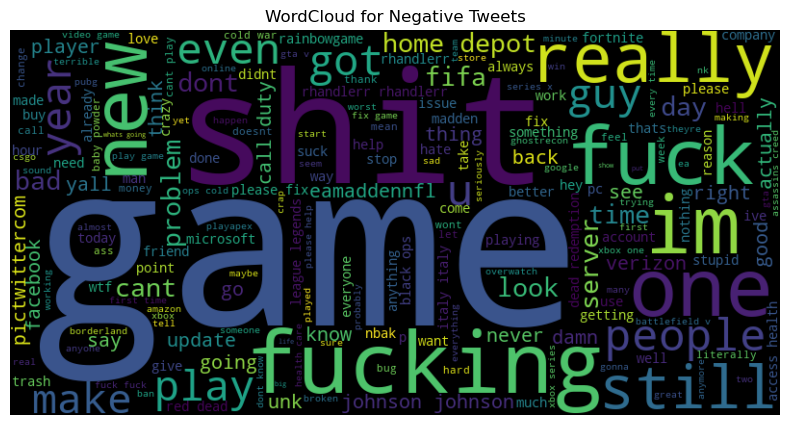

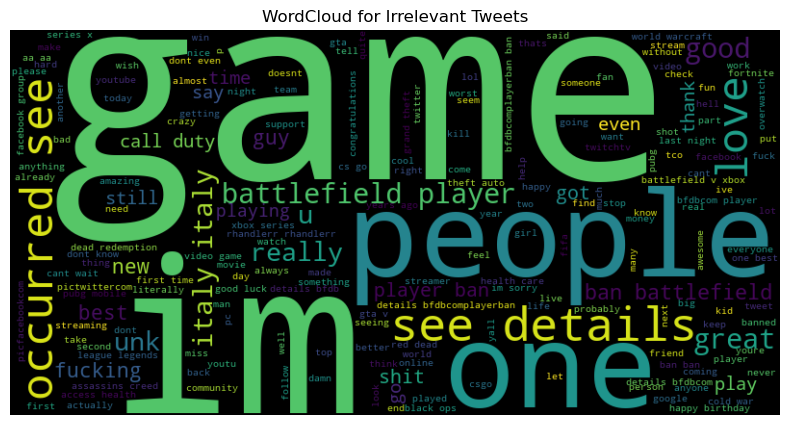

In [40]:
for sentiment in df['Sentiment'].unique():
    text = " ".join(df[df['Sentiment'] == sentiment]['Cleaned_Content'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} Tweets")
    plt.show()

### Brand-Specific Sentiment Analysis

In [45]:
brands = ['apple', 'google', 'tesla']

brand_dfs = {}

for brand in brands:
    brand_dfs[brand] = df[df['Cleaned_Content'].str.contains(brand, case=False, na=False)]

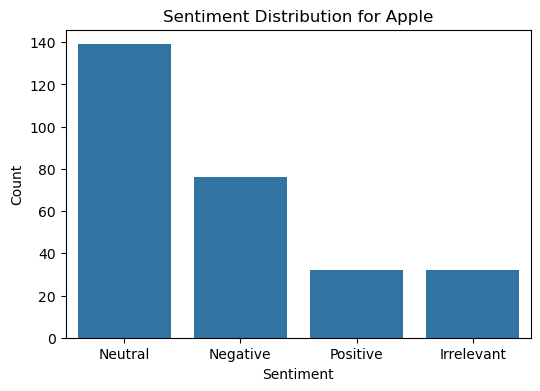

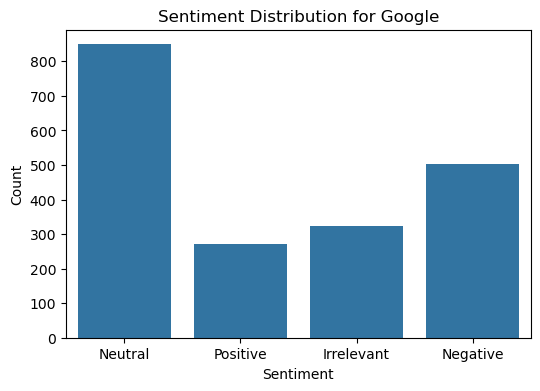

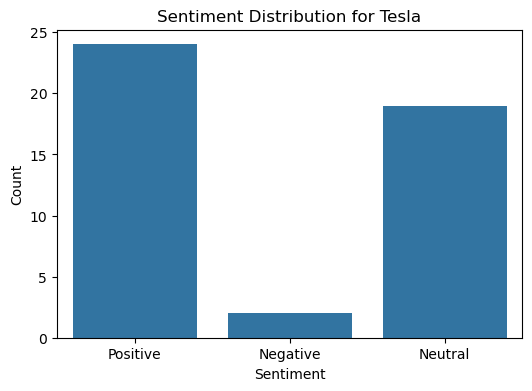

In [47]:
for brand, brand_df in brand_dfs.items():
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Sentiment', data=brand_df)
    plt.title(f"Sentiment Distribution for {brand.capitalize()}")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

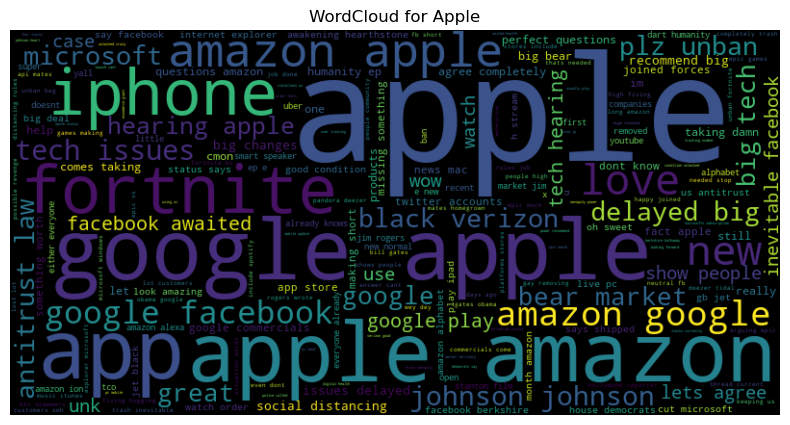

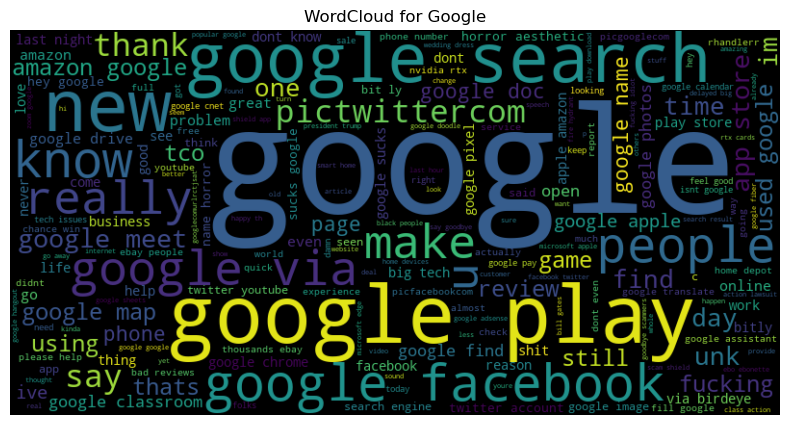

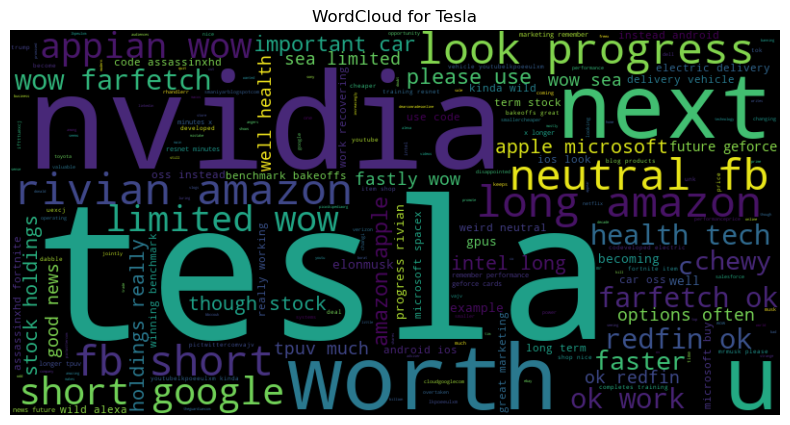

In [49]:
for brand, brand_df in brand_dfs.items():
    text = " ".join(brand_df['Cleaned_Content'].dropna())
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {brand.capitalize()}")
    plt.show()